In [1]:
# Imporing the Librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

In [2]:
# check the file folder and import model(h5 file) with best accuracy
loaded_best_model=keras.models.load_model(r"C:\Users\Dell\Desktop\cloudsek\model_07-0.80.h5")

In [3]:
# # creating a user defined function for classifying the image
def predict(image_blurness):
    img=image.load_img(image_blurness, target_size=(256,256))
    img=image.img_to_array(img, dtype=np.uint8)
    img=np.array(img)/255
    plt.title("Loaded Image")
    plt.axis("off")
    plt.imshow(img.squeeze())
    plt.show()
    r = loaded_best_model.predict(img[np.newaxis, ...])
    labels = {0: "Artificially-Blurred",1: "Naturally-Blurred",2: "Undistorted"}
    print("\n\maximum Probability:", np.max(r[0], axis=-1))
    predicted_class = labels[np.argmax([0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")
    classes=[]
    prob=[]
    print("\n---------------Individual Probability------------")
    for i,j in enumerate (r[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
    

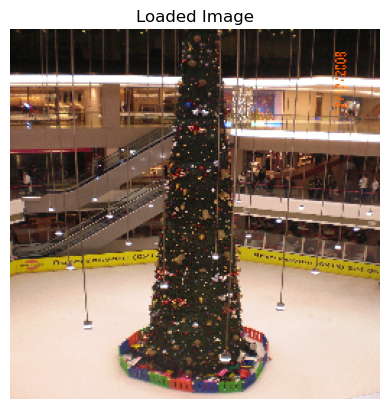

1/1 [==============================] - 0s 162ms/step

\maximum Probability: 0.838395
Classified: Artificially-Blurred 



---------------Individual Probability------------
ARTIFICIALLY-BLURRED : 1.29 %
NATURALLY-BLURRED : 14.87 %
UNDISTORTED : 83.84 %


In [4]:
# giving the image path for predicting
predict(r"C:\Users\Dell\Desktop\CloudSEK\TrainingSet\TrainingSet\Undistorted\CIMG0064.JPG")